Fpga =  0.7833333333333333
Fa =  0.8400000000000001
Fpga =  2.4
sds =  0.966
sd1 =  0.96
ts =  0.9937888198757764
to =  0.1987577639751553


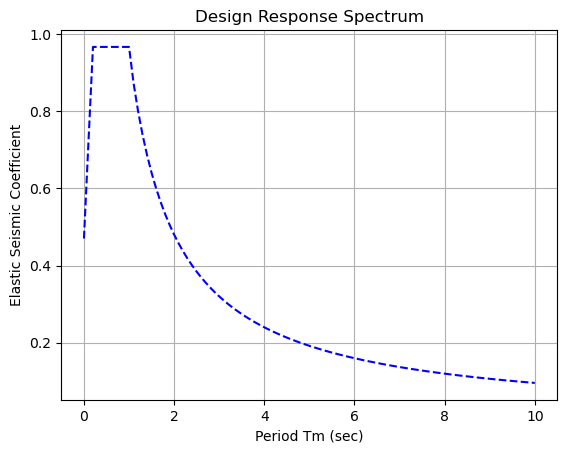

In [4]:
import bsdspy


#For SS5
pga = 0.6
ss = 1.15
s1 = 0.4

site_value = bsdspy.SeismicSiteFactor("III",pga,ss,s1)
fpga = site_value.interpolate_site_factor()
fa = site_value.get_site_factor_fa()
fv = site_value.get_site_factor_fv()

print("Fpga = ", fpga)
print("Fa = ", fa)
print("Fpga = ", fv)

site_response = bsdspy.SeismicDesignResponse(pga, fpga, ss, s1, fa, fv)
sds = site_response.calculate_sds()
sd1 = site_response.calculate_sd1()
ts = site_response.calculate_ts()
to = site_response.calculate_to()
print("sds = ", sds)
print("sd1 = ", sd1)
print("ts = ", ts)
print("to = ", to)
ss5_bsds_data = site_response.generate_design_response_spectrum()
site_response.plot_design_response_spectrum()

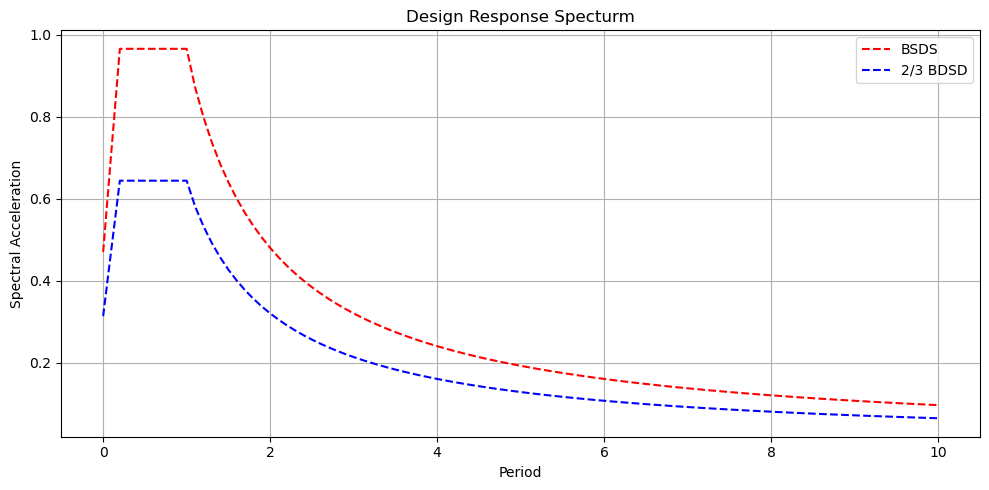

In [18]:
import matplotlib.pyplot as plt

uhs = []

# print(ss5_bsds_data)
ss5_min_x = [] 
ss5_min_y = [] 

# Populate new arrays with transformed x-values and original y-values
for x, y in zip(ss5_bsds_data[0], ss5_bsds_data[1]):
    ss5_min_x.append(x)
    ss5_min_y.append(y* (2.0 / 3.0))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(ss5_bsds_data[0], ss5_bsds_data[1], label='BSDS', linestyle='--', markersize=3, color="red")
plt.plot(ss5_min_x, ss5_min_y, label='2/3 BDSD', linestyle='--', markersize=3, color="blue")

# Format plot
plt.title('Design Response Specturm')
plt.xlabel('Period')
plt.ylabel('Spectral Acceleration')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
